In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random


In [3]:
X_train=np.loadtxt("E:/Neural-Network---MultiClass-Classifcation-with-Softmax/train_X.csv",delimiter=',').T
Y_train=np.loadtxt("E:/Neural-Network---MultiClass-Classifcation-with-Softmax/train_label.csv",delimiter=',').T
X_test=np.loadtxt("E:/Neural-Network---MultiClass-Classifcation-with-Softmax/test_X.csv",delimiter=',').T
Y_test=np.loadtxt("E:/Neural-Network---MultiClass-Classifcation-with-Softmax/test_label.csv",delimiter=',').T

In [4]:
X_train.shape


(784, 1000)

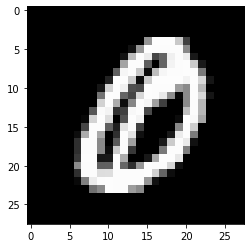

In [6]:
index = random.randrange(0, X_train.shape[1])
plt.imshow(X_train[:, index].reshape(28, 28),cmap='gray')
plt.show()

In [19]:
def tanh(x):
    return np.tanh

In [6]:
def relu(x):
    return np.maximum(x,0)

In [53]:
def softmax(x):
    expX=np.exp(x)
    return expX/np.sum(expX,axis=0)

In [22]:
def derivative_tanh(x):
    return (1-np.power(x,2))
def  derivative_relu(x):
    return(np.array(x>0,dtype=np.float32))

In [65]:
def initialize_parameters(n_x,n_h,n_y):
    w1=np.random.randn(n_h,n_x)*0.01 #initialize a weigths by random values
    b1=np.zeros((n_h,1))#iniitialize a bias values to zeors
    w2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    parameters={
        "w1":w1,
        "b1":b1,
        "w2":w2,
        "b2":b2
    }
    return parameters
    
    

In [64]:
def forwardprog(x,parameters):
    w1=parameters["w1"]
    b1=parameters["b1"]
    w2=parameters["w2"]
    b2=parameters["b2"]
    
    z1=np.dot(w1,x)+b1
    a1=relu(z1)
    
    z2=np.dot(w2,a1)+b2
    a2=softmax(z2)
    
    forward_cache={
        "Z1":z1,
        "A1":a1,
        "Z2":z2,
        "A2":a2
    }
    return forward_cache

In [30]:
def costfunction(a2,y):
    m=y.shape[1]
    cost=-(1/m)*np.sum(y*np.log(a2))
    #cost=-(1/m)*np.sum(np.sum(y*np.log(a2,0),1))
    return cost

In [67]:
def backpropogation(x,y,parameters,forward_cache):
    w1=parameters["w1"]
    b1=parameters["b1"]
    w2=parameters["w2"]
    b2=parameters["b2"]
    
    a1=forward_cache["A1"]
    a2=forward_cache["A2"]
    
    m=x.shape[1]
    
    dz2=(a2-y)
    
    dw2=(1/m)*np.dot(dz2,a1.T)
    db2=(1/m)*np.sum(dz2,axis=1,keepdims=True)
    
    dz1=(1/m)*np.dot(w2.T,dz2)*derivative_relu(a1)
    dw1=(1/m)*np.dot(dz1,x.T)
    db1=(1/m)*np.sum(dz1,axis=1,keepdims=True)
    gradients={
        "dw1":dw1,
        "db1":db1,
        "dw2":dw2,
        "db2":db2
    }
    
    return gradients
    

In [69]:
def update_parameters(parameters,gradients,learningrate):
    w1=parameters["w1"]
    b1=parameters["b1"]
    w2=parameters["w2"]
    b2=parameters["b2"]
    
    dw1=gradients["dw1"]
    db1=gradients['db1']
    dw2=gradients["dw2"]
    db2=gradients["db2"]
    
    w1=w1-learningrate*dw1
    b1=b1-learningrate*db1 
    w2=w2-learningrate*dw2
    b2=b2-learningrate*db2 
    
    parameters={
        "w1":w1,
        "b1":b1,
        "w2":w2,
        "b2":b2
    }
    return parameters
    
    

In [76]:
def model(x,y,n_h,learningrate,iterations):
    n_x=x.shape[0]
    n_y=y.shape[0]
    cos_list=[]
    
    parameters=initialize_parameters(n_x,n_h,n_y)
    for i in range(iterations):
        forward_cache=forwardprog(x,parameters)
        cost=costfunction(forward_cache['A2'],y)
        gradients=backpropogation(x,y,parameters,forward_cache)
        parameters=update_parameters(parameters,gradients,learningrate)
        cos_list.append(cost)
        if (i%(iterations/10)==0):
            print("cost after: ",i ,"iterations:",cost)
        
    return parameters,cos_list

In [77]:
itera=100
n_h=1000
Parameters,cos_list=model(X_train,Y_train,n_h=n_h,learningrate=0.002,iterations=itera)

cost after:  0 iterations: 7.412478356187768
cost after:  10 iterations: 31.228307429128744
cost after:  20 iterations: 4.451648504115475
cost after:  30 iterations: 2.607737470927175
cost after:  40 iterations: 0.8260511408852744
cost after:  50 iterations: 0.27896920653755536
cost after:  60 iterations: 0.1401241871652843
cost after:  70 iterations: 0.15711501776639802
cost after:  80 iterations: 0.7424595694269128
cost after:  90 iterations: 0.37865402355634026


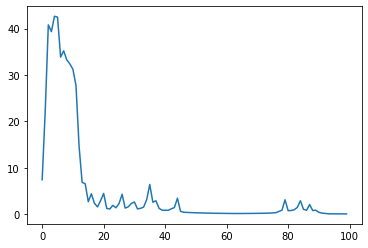

In [79]:
t=np.arange(0,itera)
plt.plot(t,cos_list)
plt.show()

In [84]:
def accurecy(inp,labels,parameters):
    forwars_cache=forwardprog(X_train,Parameters)
    a_out=forwars_cache['A2']
    a_out=np.argmax(a_out,0)
    y_out=np.argmax(Y_train,0)
    acc=np.mean(a_out==y_out)*100
    return acc


In [88]:
accurecy(X_test,Y_test,Parameters)

99.3

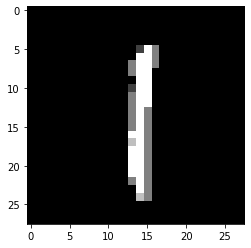

4

In [99]:
idx = random.randrange(0, X_test.shape[1])
plt.imshow(X_train[:, idx].reshape(28, 28),cmap='gray')
plt.show()
forwars_cache=forwardprog(X_test[:,idx].reshape(X_test.shape[0],1),Parameters)
a_out=forwars_cache['A2']
a_out=np.argmax(a_out,0)
a_out[0]

In [2]:
w1=np.random.randn(3,5)
w1

array([[ 0.0357245 ,  0.25134452, -1.85464263, -0.80563977, -1.54787592],
       [-1.29375774, -0.55436217, -0.00328879,  0.80004258, -0.74972814],
       [-0.97501395, -0.3311197 ,  0.70203656, -0.02698209,  1.29010518]])

In [5]:
b1=np.zeros((2,1))
b1

array([[0.],
       [0.]])

In [8]:
z1=np.dot(3,4)+b1
a1=relu(z1)

In [12]:
a1

array([[12.],
       [12.]])